In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.4435 - accuracy: 0.2212 - val_loss: 0.9277 - val_accuracy: 0.2253
Epoch 2/50
50000/50000 [==============================] - 18s 361us/step - loss: 0.8542 - accuracy: 0.2351 - val_loss: 0.8450 - val_accuracy: 0.2366
Epoch 3/50
50000/50000 [==============================] - 20s 406us/step - loss: 0.8440 - accuracy: 0.2369 - val_loss: 0.8449 - val_accuracy: 0.2369
Epoch 4/50
50000/50000 [==============================] - 17s 339us/step - loss: 0.8439 - accuracy: 0.2371 - val_loss: 0.8448 - val_accuracy: 0.2368
Epoch 5/50
50000/50000 [==============================] - 18s 357us/step - loss: 0.8437 - accuracy: 0.2372 - val_loss: 0.8446 - val_accuracy: 0.2369
Epoch 6/50
50000/50000 [==============================] - 17s 338us/step - loss: 0.8406 - accuracy: 0.2397 - val_loss: 0.8312 - val_accuracy: 0.2458
Epoch 7/50
50000/50000 [==============================] 

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RTAB.csv', index = False)

In [22]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : deer


In [23]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [24]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [25]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [26]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
58,4,deer,0.000000,0.0,0.0,0.0,0.0,0.387508,0.0,0.0,...,2.149158,0.0,3.420304,1.287613,0.0,0.0,0.0,1.451098,1.000000,1.192093e-07
9956,0,airplane,0.000000,0.0,0.0,0.0,0.0,0.507591,0.0,0.0,...,2.082624,0.0,3.426711,1.366044,0.0,0.0,0.0,1.446745,0.999368,6.315708e-04
9099,9,truck,0.000000,0.0,0.0,0.0,0.0,0.213173,0.0,0.0,...,1.929417,0.0,2.910290,1.109287,0.0,0.0,0.0,1.256508,0.999361,6.392002e-04
7472,1,automobile,0.000000,0.0,0.0,0.0,0.0,0.346363,0.0,0.0,...,2.206737,0.0,3.434643,1.130269,0.0,0.0,0.0,1.527345,0.999337,6.631613e-04
8748,6,frog,0.000000,0.0,0.0,0.0,0.0,0.347515,0.0,0.0,...,1.627359,0.0,2.643185,0.929594,0.0,0.0,0.0,1.093495,0.999314,6.860495e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,6,frog,0.319678,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.657755,0.0,3.469175,0.510475,0.0,0.0,0.0,1.367435,0.914161,8.583885e-02
6026,3,cat,0.000000,0.0,0.0,0.0,0.0,0.307542,0.0,0.0,...,1.540516,0.0,2.186536,0.086430,0.0,0.0,0.0,0.649504,0.912134,8.786595e-02
6510,4,deer,0.000000,0.0,0.0,0.0,0.0,0.269536,0.0,0.0,...,1.548551,0.0,2.128649,0.081518,0.0,0.0,0.0,1.238113,0.905562,9.443849e-02
5645,5,dog,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,2.185673,0.0,3.429530,0.253909,0.0,0.0,0.0,1.067589,0.902724,9.727639e-02


In [27]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

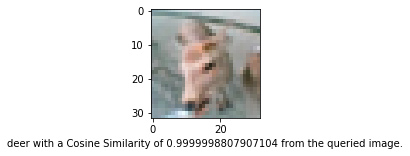

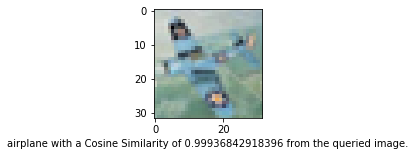

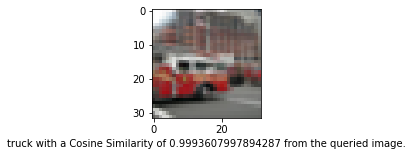

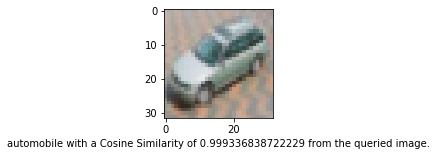

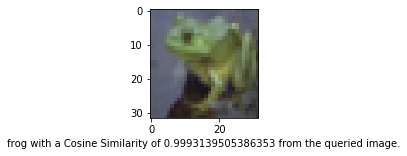

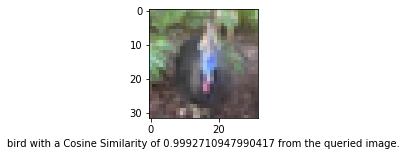

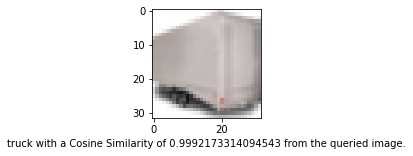

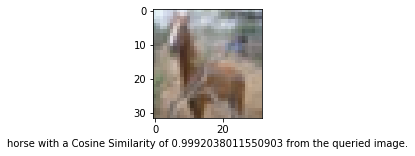

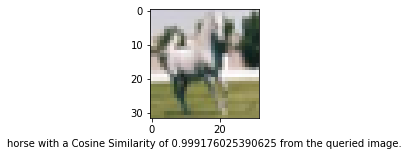

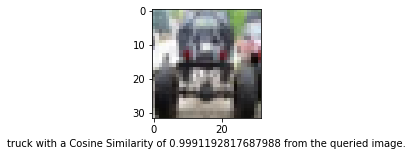

In [28]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [29]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [30]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
58,4,deer,0.0,0.0,0.0,0.0,0.0,0.387508,0.0,0.0,...,0.0,3.420304,1.287613,0.0,0.0,0.0,1.451098,1.000000,1.192093e-07,0.000000
7472,1,automobile,0.0,0.0,0.0,0.0,0.0,0.346363,0.0,0.0,...,0.0,3.434643,1.130269,0.0,0.0,0.0,1.527345,0.999337,6.631613e-04,0.334836
9956,0,airplane,0.0,0.0,0.0,0.0,0.0,0.507591,0.0,0.0,...,0.0,3.426711,1.366044,0.0,0.0,0.0,1.446745,0.999368,6.315708e-04,0.437423
9162,1,automobile,0.0,0.0,0.0,0.0,0.0,0.526113,0.0,0.0,...,0.0,3.406547,1.409183,0.0,0.0,0.0,1.388411,0.998573,1.427114e-03,0.517016
4414,2,bird,0.0,0.0,0.0,0.0,0.0,0.370119,0.0,0.0,...,0.0,3.633780,0.993759,0.0,0.0,0.0,1.649084,0.998087,1.912892e-03,0.564824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2,bird,0.0,0.0,0.0,0.0,0.0,0.017123,0.0,0.0,...,0.0,1.563545,0.409426,0.0,0.0,0.0,0.464063,0.972228,2.777249e-02,5.498978
3119,4,deer,0.0,0.0,0.0,0.0,0.0,0.033753,0.0,0.0,...,0.0,1.473284,0.378683,0.0,0.0,0.0,0.535804,0.972340,2.766001e-02,5.561013
8244,4,deer,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.737937,0.350838,0.0,0.0,0.0,0.636156,0.951083,4.891711e-02,5.598221
6941,4,deer,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.611802,0.446976,0.0,0.0,0.0,0.493481,0.973857,2.614272e-02,5.658373


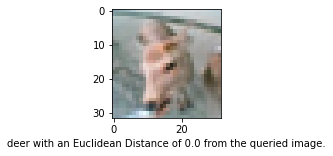

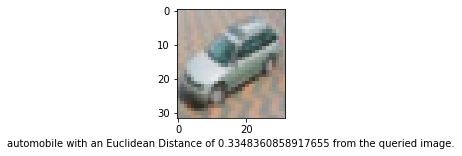

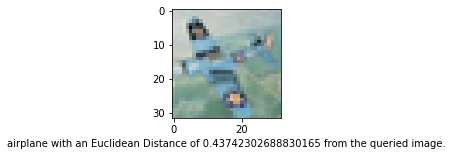

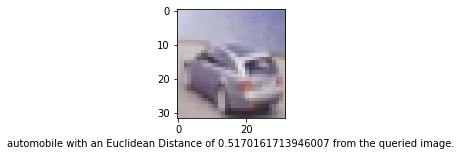

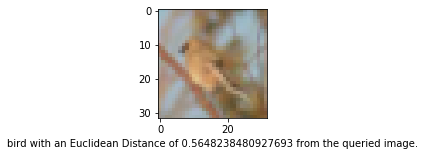

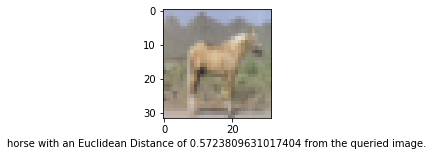

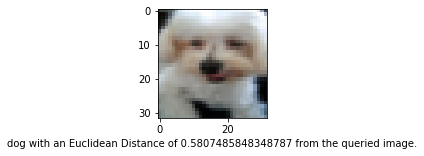

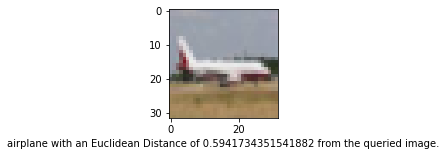

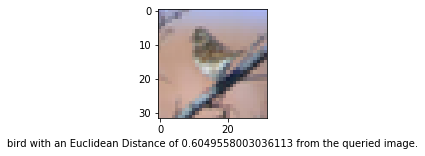

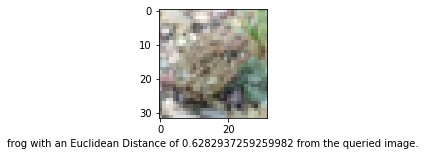

In [31]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()